# Neural Network Optimizer Comparison

This notebook demonstrates how different optimization algorithms affect the training of a simple neural network for a binary classification problem.  
We will:

1. Load and preprocess the dataset.  
2. Build a simple feed-forward neural network in PyTorch.  
3. Train the model using multiple optimizers (`SGD`, `Momentum`, `RMSprop`, `Adam`).  
4. Compare training loss and test accuracy over epochs.  
5. Visualize the results.


In [2]:
# =========================
# Importing Libraries
# =========================
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
import matplotlib.pyplot as plt

# =========================
# Data Loading & Preprocessing
# =========================
df = pd.read_csv("optimizer_lab_classification_dataset.csv")

# Features & Labels
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Standardize features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Train-Test Split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

# Convert to Tensors
x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
x_test_tensor = torch.tensor(x_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# DataLoaders
train_ds = TensorDataset(x_train_tensor, y_train_tensor)
test_ds = TensorDataset(x_test_tensor, y_test_tensor)

train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
test_loader = DataLoader(test_ds, batch_size=32)


In [3]:
# =========================
# Defining the Model
# =========================
class SimpleNN(nn.Module):
    def __init__(self, input_size=20, hidden1=64, hidden2=32, output_size=2):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden1)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden1, hidden2)
        self.relu2 = nn.ReLU()
        self.output = nn.Linear(hidden2, output_size)

    def forward(self, x):
        x = self.relu1(self.fc1(x))
        x = self.relu2(self.fc2(x))
        return self.output(x)


In [6]:
# =========================
# Training Function
# =========================
def train_model(optimizer_name, model, train_loader, test_loader, epochs=20):
    # Choose optimizer
    if optimizer_name == "SGD":
        optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
    elif optimizer_name == "Momentum":
        optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
    elif optimizer_name == "RMSprop":
        optimizer = torch.optim.RMSprop(model.parameters(), lr=0.01)
    elif optimizer_name == "Adam":
        optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

    criterion = nn.CrossEntropyLoss()
    train_losses, test_accuracies = [], []

    # Training Loop
    for epoch in range(epochs):
        model.train()
        running_loss = 0
        for xb, yb in train_loader:
            optimizer.zero_grad()
            preds = model(xb)
            loss = criterion(preds, yb)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        train_losses.append(running_loss / len(train_loader))

        # Evaluation
        model.eval()
        correct = total = 0
        with torch.no_grad():
            for xb, yb in test_loader:
                preds = model(xb)
                _, predicted = torch.max(preds, 1)
                correct += (predicted == yb).sum().item()
                total += yb.size(0)
        accuracy = correct / total
        test_accuracies.append(accuracy)

        print(f"{optimizer_name} | Epoch {epoch+1}/{epochs} | Loss: {train_losses[-1]:.4f} | Acc: {accuracy:.4f}")

    return train_losses, test_accuracies


In [8]:
# =========================
# Run Training with Different Optimizers
# =========================
optimizers = ["SGD", "Momentum", "RMSprop", "Adam"]
results = {}

for opt in optimizers:
    print(f"\nTraining with {opt}")
    model = SimpleNN()
    losses, accuracies = train_model(opt, model, train_loader, test_loader)
    results[opt] = {"loss": losses, "acc": accuracies}



Training with SGD
SGD | Epoch 1/20 | Loss: 0.7033 | Acc: 0.5100
SGD | Epoch 2/20 | Loss: 0.6958 | Acc: 0.5350
SGD | Epoch 3/20 | Loss: 0.6888 | Acc: 0.5750
SGD | Epoch 4/20 | Loss: 0.6818 | Acc: 0.6150
SGD | Epoch 5/20 | Loss: 0.6749 | Acc: 0.6500
SGD | Epoch 6/20 | Loss: 0.6679 | Acc: 0.6750
SGD | Epoch 7/20 | Loss: 0.6604 | Acc: 0.6800
SGD | Epoch 8/20 | Loss: 0.6525 | Acc: 0.7200
SGD | Epoch 9/20 | Loss: 0.6443 | Acc: 0.7150
SGD | Epoch 10/20 | Loss: 0.6357 | Acc: 0.7250
SGD | Epoch 11/20 | Loss: 0.6266 | Acc: 0.7350
SGD | Epoch 12/20 | Loss: 0.6172 | Acc: 0.7350
SGD | Epoch 13/20 | Loss: 0.6070 | Acc: 0.7350
SGD | Epoch 14/20 | Loss: 0.5965 | Acc: 0.7500
SGD | Epoch 15/20 | Loss: 0.5855 | Acc: 0.7500
SGD | Epoch 16/20 | Loss: 0.5738 | Acc: 0.7600
SGD | Epoch 17/20 | Loss: 0.5620 | Acc: 0.7750
SGD | Epoch 18/20 | Loss: 0.5495 | Acc: 0.7850
SGD | Epoch 19/20 | Loss: 0.5371 | Acc: 0.7900
SGD | Epoch 20/20 | Loss: 0.5243 | Acc: 0.7950

Training with Momentum
Momentum | Epoch 1/20 | Lo

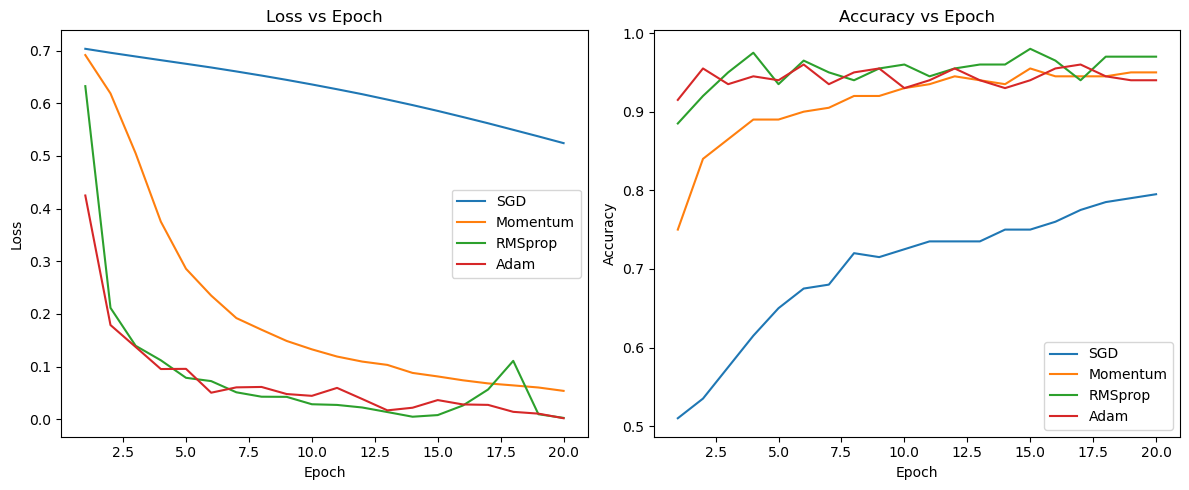

In [9]:
# =========================
# Visualization
# =========================
epochs = range(1, 21)

plt.figure(figsize=(12, 5))

# Loss Plot
plt.subplot(1, 2, 1)
for opt in optimizers:
    plt.plot(epochs, results[opt]['loss'], label=opt)
plt.title("Loss vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# Accuracy Plot
plt.subplot(1, 2, 2)
for opt in optimizers:
    plt.plot(epochs, results[opt]['acc'], label=opt)
plt.title("Accuracy vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()


# Summary

- SGD is simple but often converges slowly.  
- Momentum accelerates convergence by using past gradients.  
- RMSprop adapts learning rates and performs better on noisy data.  
- Adam combines the benefits of Momentum and RMSprop, typically achieving the best accuracy and stable loss.  

The choice of optimizer depends on the dataset and task, but Adam is usually a strong starting point.  
The plotted graphs show how different optimizers affect training dynamics over time.


### Summary

* **SGD**: Gradual improvement; final accuracy around **0.79**. Loss decreased steadily but slower than other optimizers.
* **Momentum**: Faster convergence and better accuracy (~**0.95**) with lower loss.
* **RMSprop**: Best overall performance with accuracy ~**0.97**, though slight fluctuations in later epochs.
* **Adam**: Stable and strong performance (~**0.94**), good default choice.

**Key Takeaway:** RMSprop gave the best accuracy in this run, Momentum was a close second. Adam remains a solid default optimizer. SGD showed slower learning. Further validation with cross-validation and hyperparameter tuning is recommended to confirm these results.
